In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data
data = pd.read_csv('/Users/deepshikasharma/Downloads/Viamo_sample/3m_uganda-3m_uganda_000000000013.csv')

For calculating retatined users, we need subscriber IDs. We need to know who called and are they calling every month, every two months, every quarter? etc.

Since rows are blocks, we need to remove duplicate call IDs and only keep unique or the first instance of call_ids. We also only want active users (those listen to KMs) so remove rows that are NaN in the listener column.

In [3]:
#select relevant columns for analysis
df = data[['call_date','call_id','subscriber_id', 'listener']]

In [4]:
df.head()

,call_date,call_id,subscriber_id,listener
0,2022-08-29,1411062908402008340,1397798074763971536,NaN
1,2022-09-02,1412485952941066896,1408874694534758612,1.408875e+18
2,2022-10-27,1432189857224458692,1413001236147866916,NaN
3,2022-10-23,1430774187920197780,1397131186593596196,NaN
4,2022-11-04,1435301555460374868,700749130498048001,NaN


In [5]:
#remove rows with NaN values in listener column
df.dropna(subset = ['listener'], inplace = True)

In [6]:
#drop listener column because it's redudant - we now have all the rows where user listened to KM aka 
#active users
df.drop(['listener'], inplace = True, axis = 1)

In [7]:
df.head()

,call_date,call_id,subscriber_id
1,2022-09-02,1412485952941066896,1408874694534758612
50,2022-09-12,1416057625095177896,1416047894435726936
51,2022-09-21,1419361581967870320,1368799985759946420
52,2022-09-17,1417906730947838716,1384392720051077152
53,2022-09-14,1416824151293299292,1148581694216339456


In [8]:
#convert call_date data type from object to datetime
df['call_date'] = pd.to_datetime(df.call_date)
#extract month from call_date column 
df['Month'] = df['call_date'].dt.month_name()

Repeating call_ids on the same date means the user intereacted with multiple blocks on the same call on the same date. The call_id repeats because every time a user interacts with a new block, that same call_id is listed with the block. 

In [9]:
#keep unique call_ids only. remove duplicates and only keep first instance.
df.drop_duplicates(subset=['call_id'], keep='first', inplace = True)

In [10]:
#need to custom sort the dataframe by month chronologically
months_categories = ["August", "September", "October", "November"]
df["Month"] = pd.Categorical(df["Month"], categories = months_categories)
df = df.sort_values(by = "Month")

In [11]:
#drop call_id because now we have only rows that contain active users and
#have made sure the same call (call_id) is not double counted.
#call_date is removed because we have the Month column
df.drop(['call_id','call_date'], inplace = True, axis = 1)

In [12]:
count = df.groupby('subscriber_id').count().reset_index()

In [13]:
count.sort_values(by='Month', ascending=True, inplace = True)

In [14]:
count.rename(columns = {'Month':'# of calls'}, inplace = True)

In [15]:
count.drop(['subscriber_id'], axis = 1, inplace = True)

In [16]:
maus_count = count.pivot_table(columns=['# of calls'], aggfunc='size')

In [17]:
maus_count = pd.DataFrame(maus_count).reset_index()

In [18]:
maus_count.rename(columns = {0:'# of users'}, inplace = True)

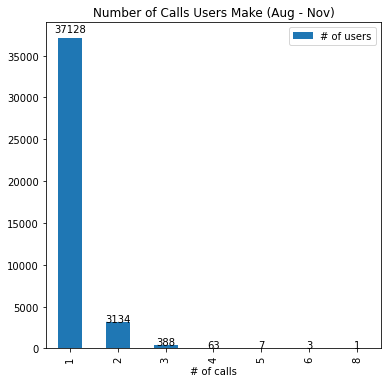

In [19]:
#create plot one
plt.rcParams["figure.figsize"] = (6, 6)
ax = maus_count.plot(x='# of calls', y ='# of users',kind='bar')
ax.set_title('Number of Calls Users Make (Aug - Nov)')
ax.legend(bbox_to_anchor=(1.0, 1.0))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

plt.savefig('Number_of_Calls_Users_Make.jpeg', bbox_inches='tight')